In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt 
df = pd.read_csv('D:\\movie_metadata.csv', 
                  error_bad_lines=False)
df.columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 
              'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 
              'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 
              'actor_3_name', 'facenumber_in_poster', 'plot_keywords','movie_imdb_link','num_user_for_reviews','language,',
             'country','content_rating','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes']
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,"language,",country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


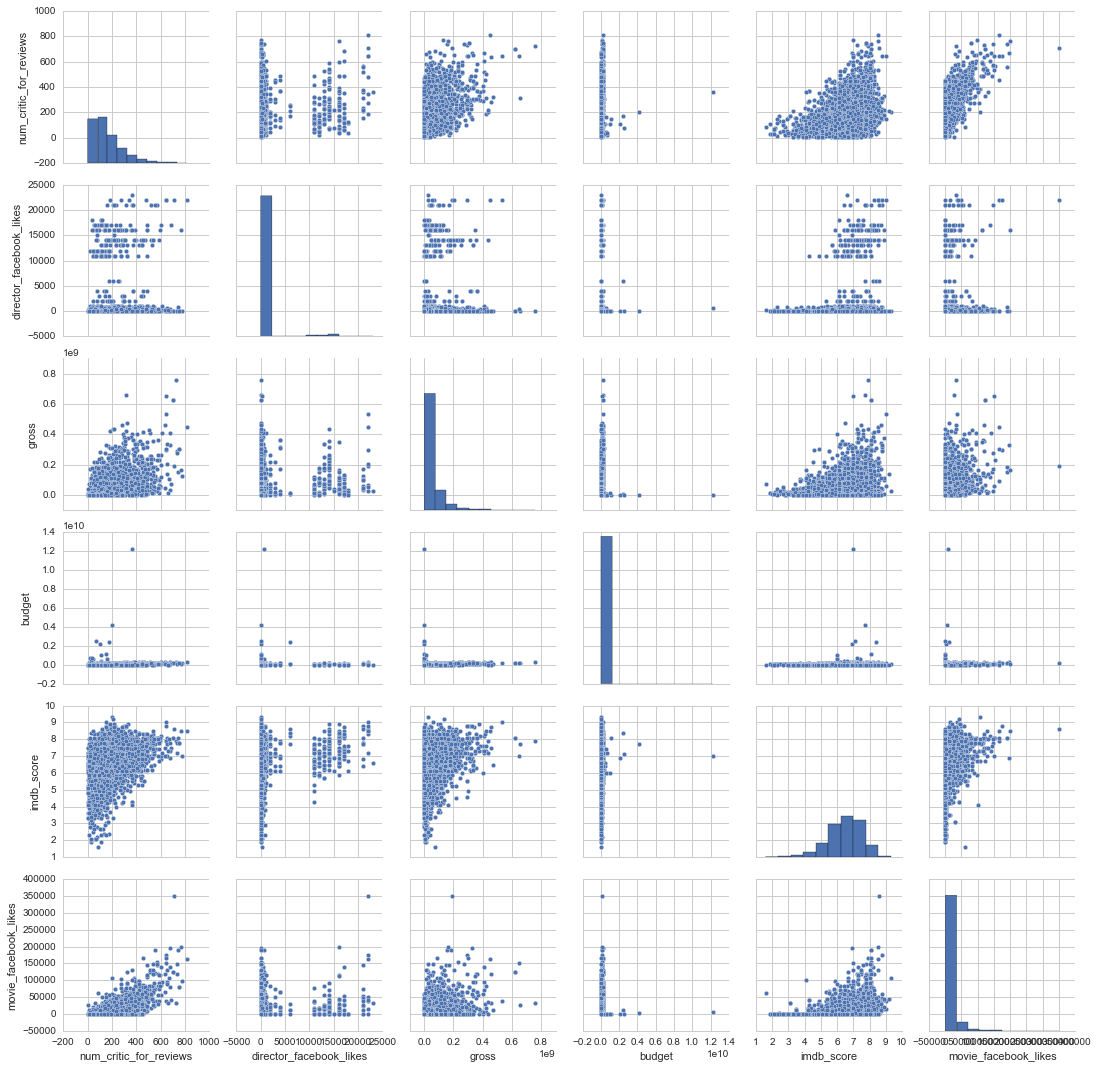

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
cols = ['num_critic_for_reviews', 'director_facebook_likes', 'gross', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols].dropna())
plt.show()

The scatterplot matrix shows some information about different attributes. We could see the connection between these variables are
complicated not simply linear.

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


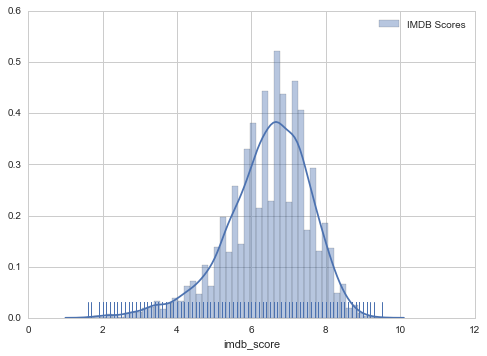

In [26]:
score=df['imdb_score']
sns.distplot(score,rug=True,label="IMDB Scores").legend()

We could see the total IMDB forms a near Guassion Distribution. The mean of the score is around 7. Futher prediction will demonstrate in similar graph to evaluate the model.

In [7]:
res=df.groupby(['director_name'], as_index=False)['imdb_score'].mean().sort(['imdb_score','director_name'],ascending=False)
res=res[0:20]
res


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,director_name,imdb_score
1084,John Blanchard,9.500
2011,Sadyk Sher-Niyaz,8.700
1620,Mitchell Altieri,8.700
299,Cary Bell,8.700
1606,Mike Mayhall,8.600
315,Charles Chaplin,8.600
1979,Ron Fricke,8.500
1835,Raja Menon,8.500
1417,Majid Majidi,8.500
428,Damien Chazelle,8.500


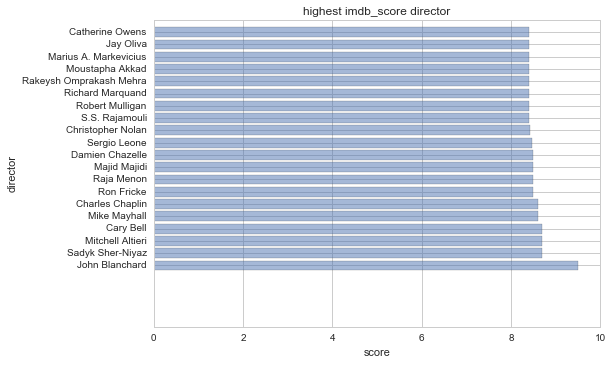

In [8]:
a=res['director_name']
b=res['imdb_score']
y_pos = np.arange(len(a))
plt.title("highest imdb_score director")
plt.xlabel("score")
plt.ylabel("director")
plt.barh(y_pos,b, align='center', alpha=0.5)
plt.yticks(y_pos, a)
plt.show()

The top 20 imdb_score directors are shown in the bar graph. This information is very important for us to predict whether a movie is good or bad. 

In [10]:
res2=df.groupby(['content_rating'], as_index=False)['imdb_score'].mean().sort(['imdb_score','content_rating'],ascending=False)
res2=res2[0:20]
res2

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,content_rating,imdb_score
12,TV-MA,8.250000
14,TV-Y,7.400000
13,TV-PG,7.353846
0,Approved,7.325455
10,TV-14,7.250000
15,TV-Y7,7.200000
8,Passed,7.166667
16,Unrated,6.920968
11,TV-G,6.920000
2,GP,6.916667


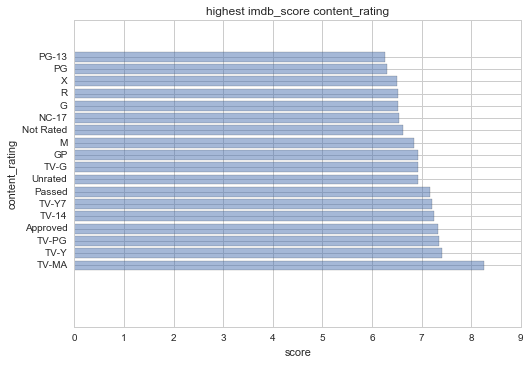

In [12]:
a=res2['content_rating']
b=res2['imdb_score']
y_pos = np.arange(len(a))
plt.title("highest imdb_score content_rating")
plt.xlabel("score")
plt.ylabel("content_rating")
plt.barh(y_pos,b, align='center', alpha=0.5)
plt.yticks(y_pos, a)
plt.show()

Whether the content_rating is connected to imdb_score worth thinking. As it is shown in the graph, we could see that TV-MA has the highest score.

In [19]:
res3=df.groupby(['actor_1_name'], as_index=False)['imdb_score'].mean().sort(['imdb_score','actor_1_name'],ascending=False)
res3=res3[0:20]
res3

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,actor_1_name,imdb_score
1129,Krystyna Janda,9.10
792,Jack Warden,8.90
1660,Rob McElhenney,8.80
1889,Takashi Shimura,8.70
1267,Maria Pia Calzone,8.70
1111,Kimberley Crossman,8.70
793,Jackie Gleason,8.70
562,Elina Abai Kyzy,8.70
6,Abigail Evans,8.70
1717,Ruth Wilson,8.60


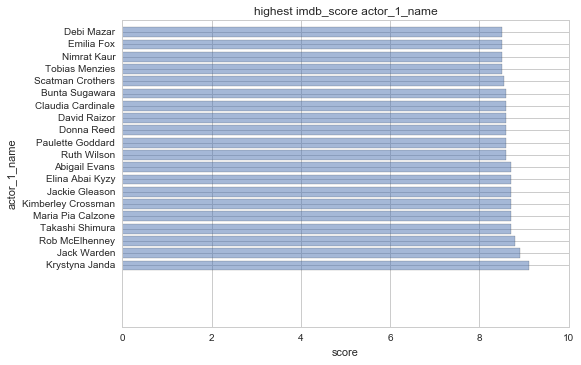

In [22]:
a=res3['actor_1_name']
b=res3['imdb_score']
y_pos = np.arange(len(a))
plt.title("highest imdb_score actor_1_name")
plt.xlabel("score")
plt.ylabel("actor_1_name")
plt.barh(y_pos,b, align='center', alpha=0.5)
plt.yticks(y_pos, a)
plt.show()

The graph demonstrates the actor that has the highest imdb_score.

In [30]:
res4=df.groupby(['director_name'], as_index=False)['num_critic_for_reviews'].sum().sort(
    ['num_critic_for_reviews','director_name'],ascending=False)
res4=res4[0:20]
res4


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,director_name,num_critic_for_reviews
2157,Steven Spielberg,6582.0
1901,Ridley Scott,4930.0
1785,Peter Jackson,4542.0
1477,Martin Scorsese,4285.0
391,Clint Eastwood,4244.0
2219,Tim Burton,4200.0
373,Christopher Nolan,4090.0
2156,Steven Soderbergh,3934.0
2024,Sam Raimi,3900.0
2376,Woody Allen,3599.0


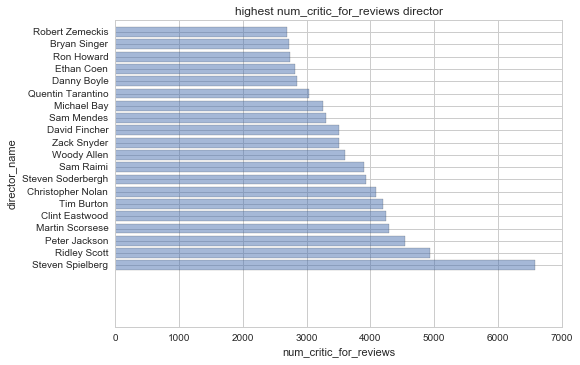

In [31]:
a=res4['director_name']
b=res4['num_critic_for_reviews']
y_pos = np.arange(len(a))
plt.title("highest num_critic_for_reviews director")
plt.xlabel("num_critic_for_reviews")
plt.ylabel("director_name")
plt.barh(y_pos,b, align='center', alpha=0.5)
plt.yticks(y_pos, a)
plt.show()

We could see the top 20 number of critics of the reviews of each director. This could be a vital variable to decide which director is better.

In [46]:
regA = linear_model.LinearRegression()
a=df['imdb_score']
b=df['num_critic_for_reviews']
x_trainA=df.iloc[:-1000,b].dropna()
y_trainA=df.iloc[:-1000,a].dropna()
x_testA=df.iloc[-1000:,b].dropna()
y_testA=df.iloc[-1000:,a].dropna()
regA.fit(x_trainA,y_trainA)
print('Slope: \n', regA.coef_)
print('Intercept:\n',regA.intercept_)
print('Score: %.2f' % regA.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % np.mean((regA.predict(x_testA) - y_testA) ** 2))

E:\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


IndexError: index 723 is out of bounds for axis 1 with size 28